# LAB 1: LINEAR REGRESSION

Nhóm: DSC

Thành viên thực hiện:
+ Lê Đình Đức - 19521372
+ Phan Anh Lộc - 19521766
+ Lưu Anh Dũng - 19521392

# 1. Xử lí dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#đọc data từ tập train
data_train = pd.read_csv("http://cs.uit.edu.vn/data2.txt", header=None, names = ['Numbers of input', 'Execution time'])
#data3.txt và data4.txt dùng để test model
data_test1 = pd.read_csv("http://cs.uit.edu.vn/data3.txt", header=None, names = ['Numbers of input', 'Execution time'])
data_test2 = pd.read_csv("http://cs.uit.edu.vn/data4.txt", header=None, names = ['Numbers of input', 'Execution time'])
data_train

,Numbers of input,Execution time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977
...,...,...
71110,4472112,0.350379
71111,5471895,0.429955
71112,9837364,0.801394
71113,9466593,0.776407


In [ ]:
data_test1

,Numbers of input,Execution time
0,37837612,4.12166
1,37395246,3.92089
2,36610827,3.21540
3,29555651,2.54506
4,25928216,2.21831
...,...,...
10585,26872494,2.35117
10586,20753811,1.79155
10587,33520323,2.90918
10588,21243264,1.80292


In [ ]:
data_test2

,Numbers of input,Execution time
0,50142057,5.51836
1,65232531,7.18304
2,67683741,6.94395
3,59798449,5.48383
4,62297119,5.65503
...,...,...
6018,54062895,4.95203
6019,67529727,6.28587
6020,60771350,5.57836
6021,62607526,5.78302


In [ ]:
#Phân chia dữ liệu tập train
x_train, y_train = np.array(data_train['Numbers of input']).reshape(-1,1), np.array(data_train['Execution time'])
#Phân chia dữ liệu tập test
x_test1, y_test1 = np.array(data_test1['Numbers of input']).reshape(-1,1), np.array(data_test1['Execution time'])
x_test2, y_test2 = np.array(data_test2['Numbers of input']).reshape(-1,1), np.array(data_test2['Execution time'])

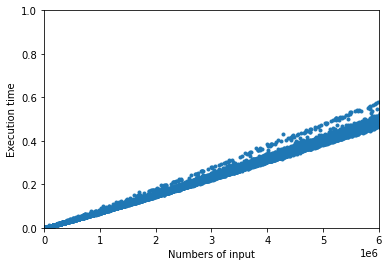

In [ ]:
#Trực quan hóa dữ liệu train
plt.plot(x_train, y_train, '.')
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.axis([0, 6000000, 0, 1])
plt.show()

# 2. Tạo model linear regression để dự đoán execution time

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

# Tạo model train
model = LinearRegression().fit(x_train,y_train)

In [ ]:
#Chạy model bộ train
y_predict_train = model.predict(x_train)

In [ ]:
#Chạy model bộ test data3
y_predict_test1 = model.predict(x_test1) 
#Chạy model bộ test data4
y_predict_test2 = model.predict(x_test2) 

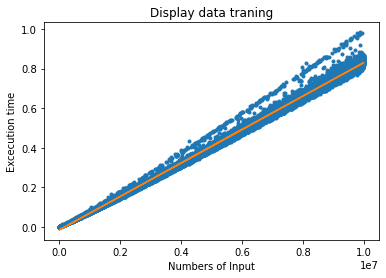

In [ ]:
# Trực quan hóa trên kết quả dự đoán và thực tế
plt.title("Display data traning")
plt.plot(x_train, y_train, ".")
plt.plot(x_train, model.predict(x_train))
plt.xlabel('Numbers of Input')
plt.ylabel('Excecution time')
plt.show()

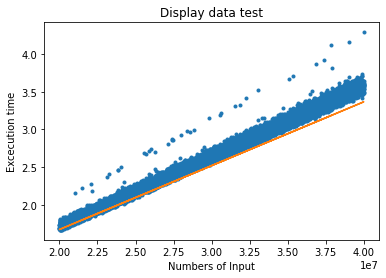

In [ ]:
#Trực quan hóa trên tập test và tập dự đoán đầu vào tập test data3
plt.title("Display data test")
plt.plot(x_test1, y_test1, ".")
plt.plot(x_test1, model.predict(x_test1))
plt.xlabel('Numbers of Input')
plt.ylabel('Excecution time')
plt.show()

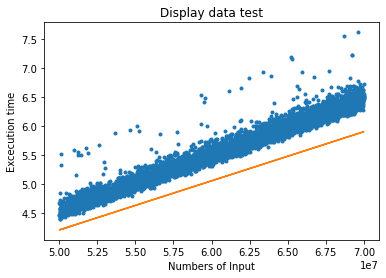

In [ ]:
#Trực quan hóa trên tập test và tập dự đoán đầu vào tập test data4
plt.title("Display data test")
plt.plot(x_test2, y_test2, ".")
plt.plot(x_test2, model.predict(x_test2))
plt.xlabel('Numbers of Input')
plt.ylabel('Excecution time')
plt.show()

In [ ]:
# Tính toán độ lỗi của model trên tập train
print("Mean squared error with data_to_train: ", mean_squared_error(y_train, model.predict(x_train)))
# Tính toán độ lỗi của model trên tập test
print("Mean squared error with data_to_test3: ", mean_squared_error(y_test1, model.predict(x_test1)))
print("Percent difference: ",math.sqrt(mean_squared_error(y_test1, model.predict(x_test1)))/np.average(y_test1))
print("Mean squared error with data_to_test4: ", mean_squared_error(y_test2, model.predict(x_test2)))
print("Percent difference: ",math.sqrt(mean_squared_error(y_test2, model.predict(x_test2)))/np.average(y_test2))

Mean squared error with data_to_train:  0.00014337728721748835
Mean squared error with data_to_test3:  0.020664949397549082
Percent difference:  0.05439398887357004
Mean squared error with data_to_test4:  0.22348476817426036
Percent difference:  0.08578936785095169


Nhận xét: Model hoạt động tốt trên tập train (độ lỗi thấp) nhưng tệ trên tập test (độ lỗi cao).

**- Kết luận:**

+ Vì thời gian chạy của chương trình phải phụ thuộc vào độ phức tạp của thuật toán đó nên độ phức tạp của thuật toán làm chi phối thời gian chạy của chương trình
+ Vì thế thời gian chạy của thuật toán và kích thước của của Input đầu vào chưa chắc nó sẽ là một hàm tuyến tính nên khi chung ta tìm được hệ số y = ax + b tốt đến cỡ nào đi nữa thì khi nó gặp x có giá trị lớn hơn thì sẽ xuất hiện sai lệch
+ Chênh lệch 5% và 8% có thể là tốt đối với model sử dụng Linear Regression nhưng khi input đầu vào là một con số lớn thì nó sẽ khiến độ sai lệch của model tăng lên rất nhiều



# 3. Increase Dimension

In [ ]:
def newFeature(x_value):
  x = x_value
  x = np.hstack((x, np.log2(x_value)))
  x = np.hstack((x, x_value*np.log2(x_value)))
  x = np.hstack((x, x_value*x_value))
  return x

In [ ]:
# Xử lí data train bằng Increase Dimension
x1_train = newFeature(x_train)
# Xử lí data test bằng Increase Dimension
x_test1_new = newFeature(x_test1)
x_test2_new = newFeature(x_test2)

In [ ]:
#Tạo model
model1 = LinearRegression().fit(x1_train,y_train)
# Chạy model bộ train
y1_predict_train = model1.predict(x1_train)
# Chạy model bộ test
y_predict_test1_new = model1.predict(x_test1_new) 
y_predict_test2_new = model1.predict(x_test2_new) 

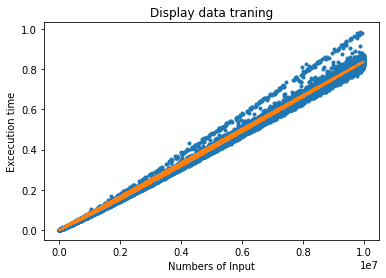

In [ ]:
# Trực quan hóa trên kết quả dự đoán và thực tế sau khi sử dụng Increase Dimension
plt.title("Display data traning")
plt.plot(x_train, y_train, ".")
plt.plot(x_train, model1.predict(x1_train))
plt.xlabel('Numbers of Input')
plt.ylabel('Excecution time')
plt.show()

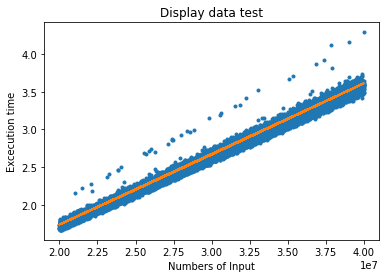

In [ ]:
#Trực quan hóa dữ liệu trên tập test và tập dự đoán từ đầu vào tập test data3 sau khi dùng Increase Dimension
plt.title("Display data test")
plt.plot(x_test1, y_test1, ".")
plt.plot(x_test1, model1.predict(x_test1_new))
plt.xlabel('Numbers of Input')
plt.ylabel('Excecution time')
plt.show()

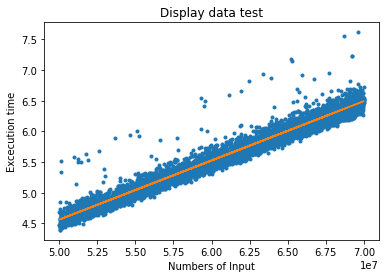

In [ ]:
#Trực quan hóa dữ liệu trên tập test và tập dự đoán từ đầu vào tập test data4 sau khi dùng Increase Dimension
plt.title("Display data test")
plt.plot(x_test2, y_test2, ".")
plt.plot(x_test2, model1.predict(x_test2_new))
plt.xlabel('Numbers of Input')
plt.ylabel('Excecution time')
plt.show()

In [ ]:
# Tính toán độ lỗi của model trên tập train sau khi dùng Increase Dimension
print("Mean squared error with data_to_train: ", mean_squared_error(y_train, model1.predict(x1_train)))
# Tính toán độ lỗi của model trên tập test sau khi dùng Increase Dimension
print("Mean squared error with data_to_test3: ", mean_squared_error(y_test1, model1.predict(x_test1_new)))
print("Percent difference: ",math.sqrt(mean_squared_error(y_test1, model1.predict(x_test1_new)))/np.average(y_test1))
print("Mean squared error with data_to_test4: ", mean_squared_error(y_test2, model1.predict(x_test2_new)))
print("Percent difference: ",math.sqrt(mean_squared_error(y_test2, model1.predict(x_test2_new)))/np.average(y_test2))

Mean squared error with data_to_train:  0.00012190225045388428
Mean squared error with data_to_test3:  0.004181175138868819
Percent difference:  0.024467123534333654
Mean squared error with data_to_test4:  0.01461965795175033
Percent difference:  0.021942095919085556


**Nhận xét:**
+ Có thể thấy được MSE của phương pháp Increase Dimension trên bộ test data3 và data4 nhỏ hơn rất nhiều so với model sử dụng Linear Regression. Cụ thể: MSE của bộ test data3 giảm 5 lần (0.020664949397549082 -> 0.004181175138868819) và MSE của bộ test data 4 giảm 20 lần (0.22348476817426036 -> 0.01461965795175033)
+ Độ chênh lệch giảm đi đáng kể. Cụ thể: test data3 (0.05439398887357004 -> 0.024467123534333654) và test data4 (0.08578936785095169 -> 0.021942095919085556)

**Kết luận:**
+ Việc lựa chọn tham số điều chỉnh trong các hàm sẽ giúp giảm độ lỗi của model.
+ Có thể thấy được sau khi tăng chiều dữ liệu bằng thêm vào dữ liệu gốc các cột giá trị: x bình phương, log2x, x*log2x. Ta thu được kết quả tốt hơn dữ liệu ban đầu.